# <center><font color=slate>Objects And Types</font></center>
## <center><font color=tomato>Assignment to a variable</font></center>

-   Python uses named references to objects
-   Assignments attaches a name to an object
-   Assigning one name to another makes them both point at the same object
-   The garbage collector removes objects with no references

When a operator is applied then python a new object with the result
is assigned to the name (variable), for the following examples we
can use the function `id()`

`id()` returns a unique integer ID for an object

`is` determines if two names refer to the same object

We can test for equivalence with `==`

### <font color=lightGreen>Example with integers</font>
![](img/image1.png)

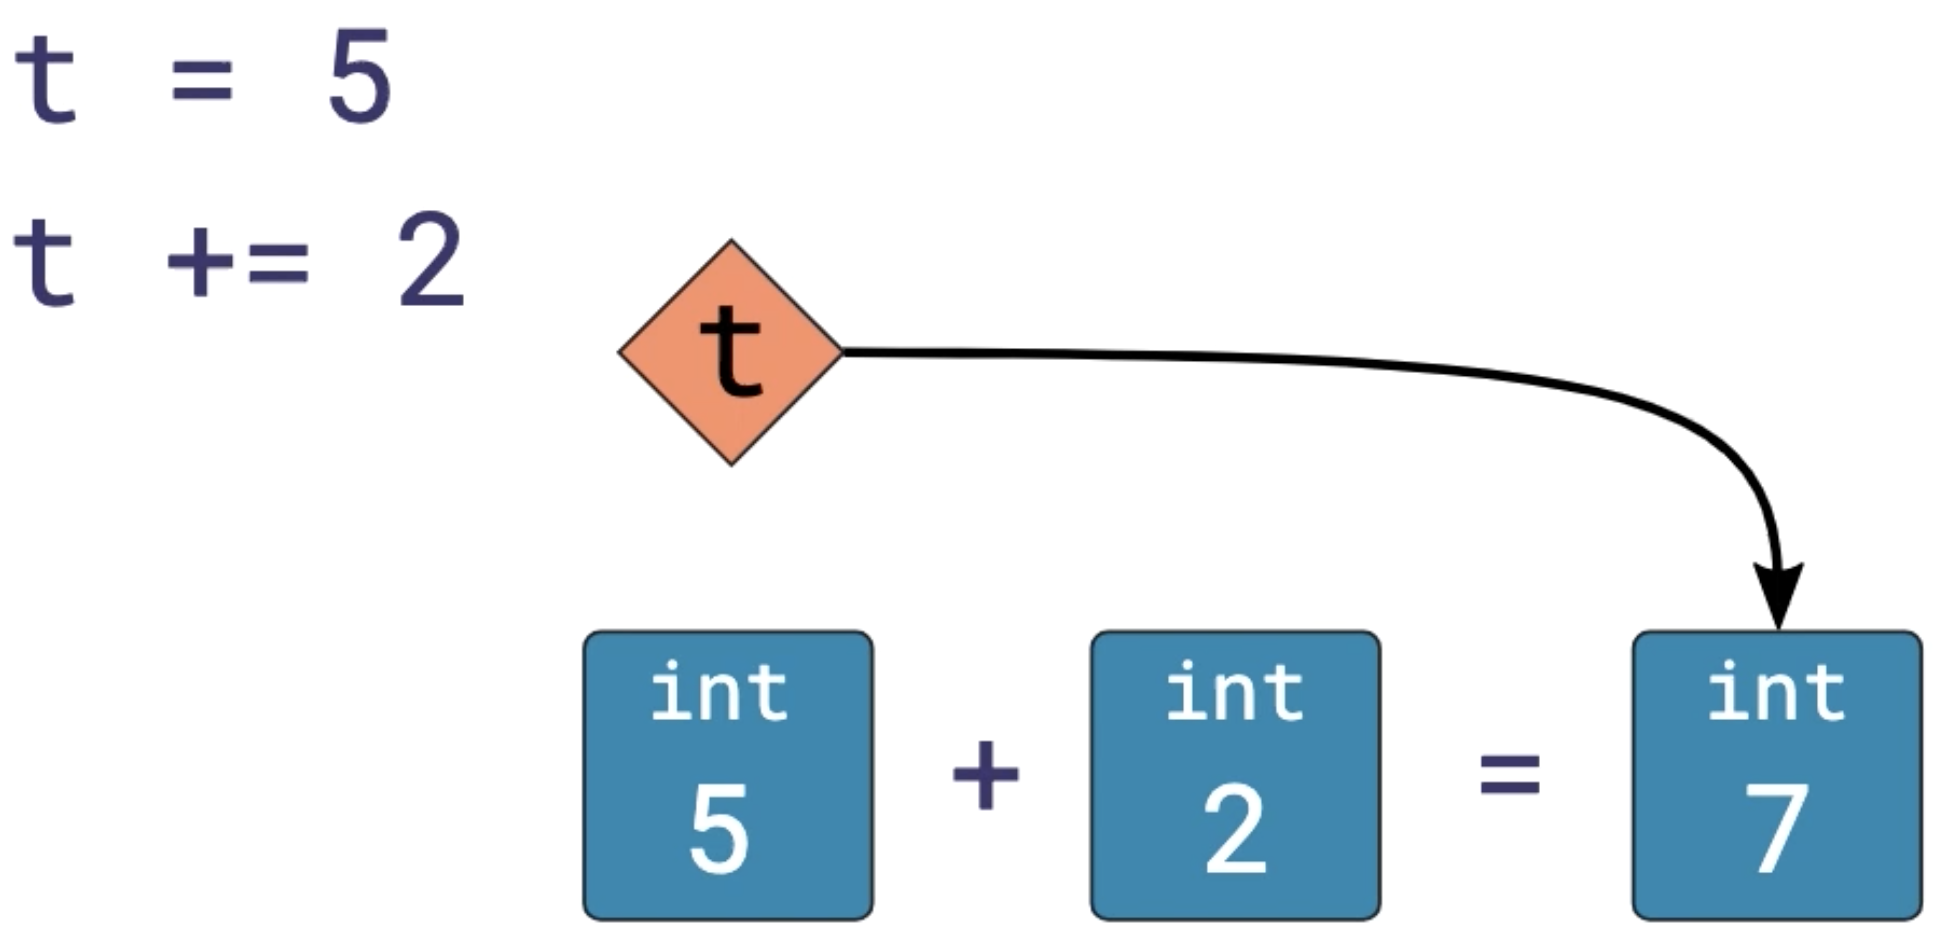

In [59]:
from IPython.core.display import Image, display
display(Image('img/image1.png', width=400, unconfined=True))

In [60]:
a = 332
id(a)

140502670740112

In [61]:
b = 2134
id(b)

140502670739984

In [62]:
b = a
id(b)

140502670740112

In [63]:
a is b

True

In [64]:
a is None

False

In [65]:
t = 5
id(t)

4544641824

In [66]:
t += 2
id(t)

4544641888

### <font color=lightGreen>Example with mutable objects</font>

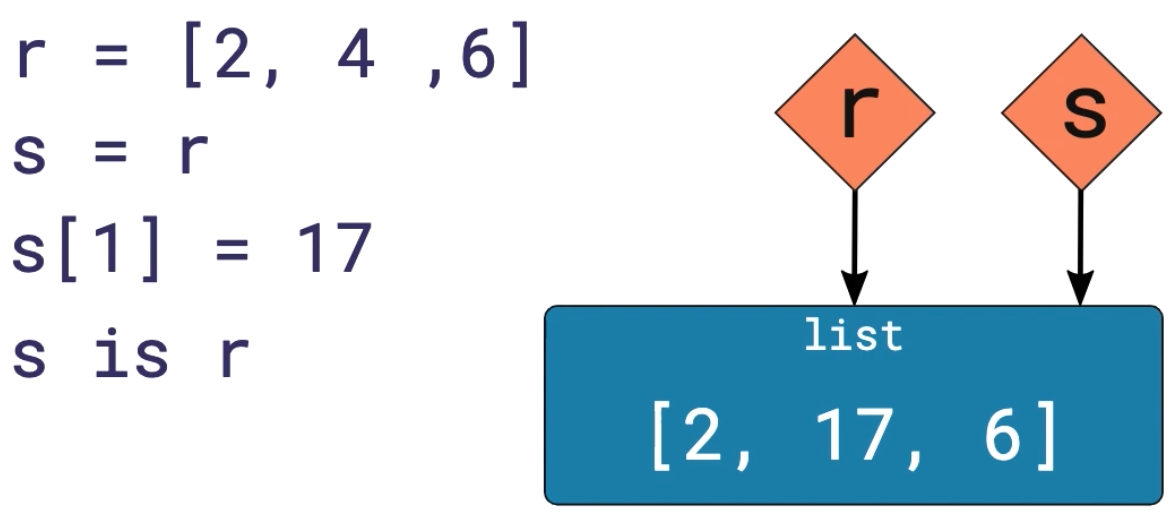

In [67]:
from IPython.core.display import Image, display
display(Image('img/image2.png', width=400, unconfined=True))

In [68]:
r = [2, 4, 6]
print('r = ',r)

r =  [2, 4, 6]


In [69]:
s = r
s[1] = 17
print('s = ',s)
print('r = ',r)
print('s is r = ',s is r)

s =  [2, 17, 6]
r =  [2, 17, 6]
s is r =  True


## <center><font color=tomato>Value vs Identity Equality</font></center>

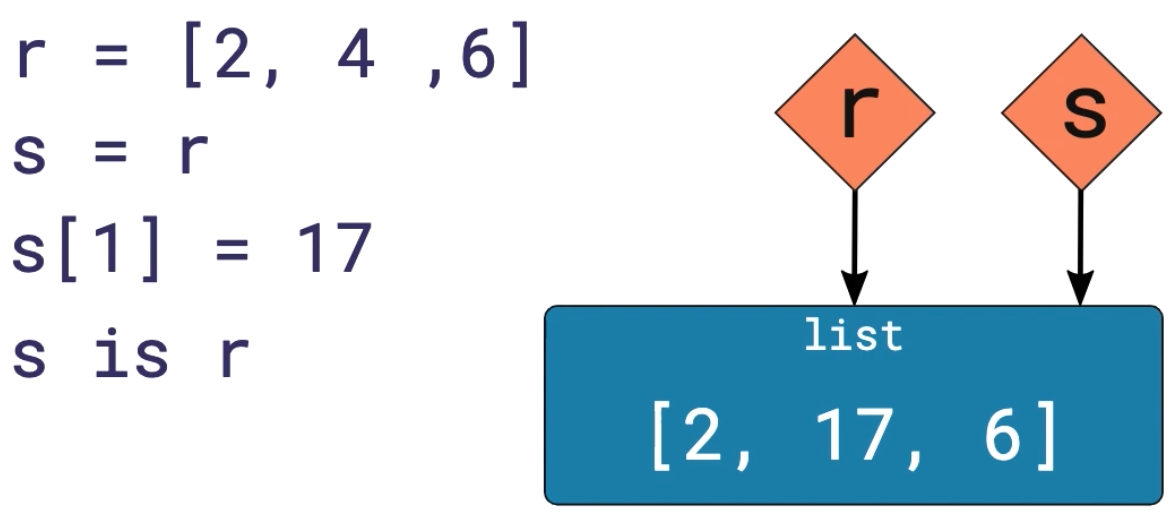

In [70]:
from IPython.core.display import Image, display
display(Image('img/image2.png', width=400, unconfined=True))

In [71]:
p = [4, 7, 11]
q = [4, 7, 11]
p == q

True

In [72]:
p is q

False

In [73]:
p == p


True

***
## <center><font color=tomato>Passing arguments and returning values</font></center>
### <font color=lightGreen>Argument passing</font>
-   Function arguments are passed by object reference

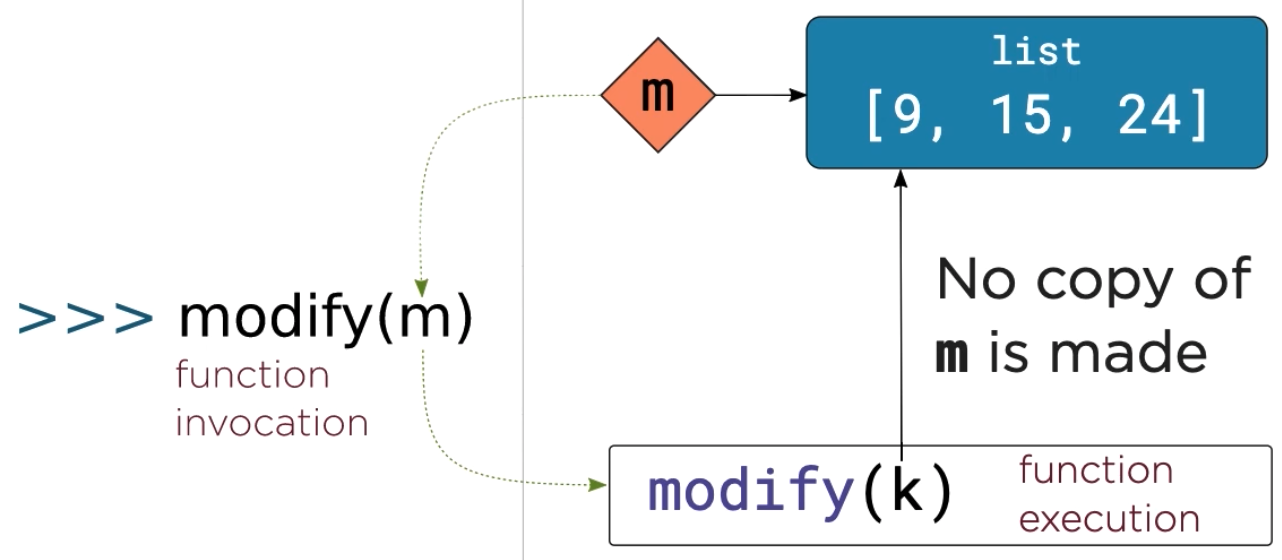

In [74]:
from IPython.core.display import Image, display
display(Image('img/image3.png', width=400, unconfined=True))

In [75]:
m = [9, 15, 24]
def modify(k):
    k.append(39)
    print('k = ', k)

modify(m)

k =  [9, 15, 24, 39]


In [76]:
m

[9, 15, 24, 39]

### <font color=lightGreen>Replacing argument value</font>
-   Rebinding function arguments loses the original object reference

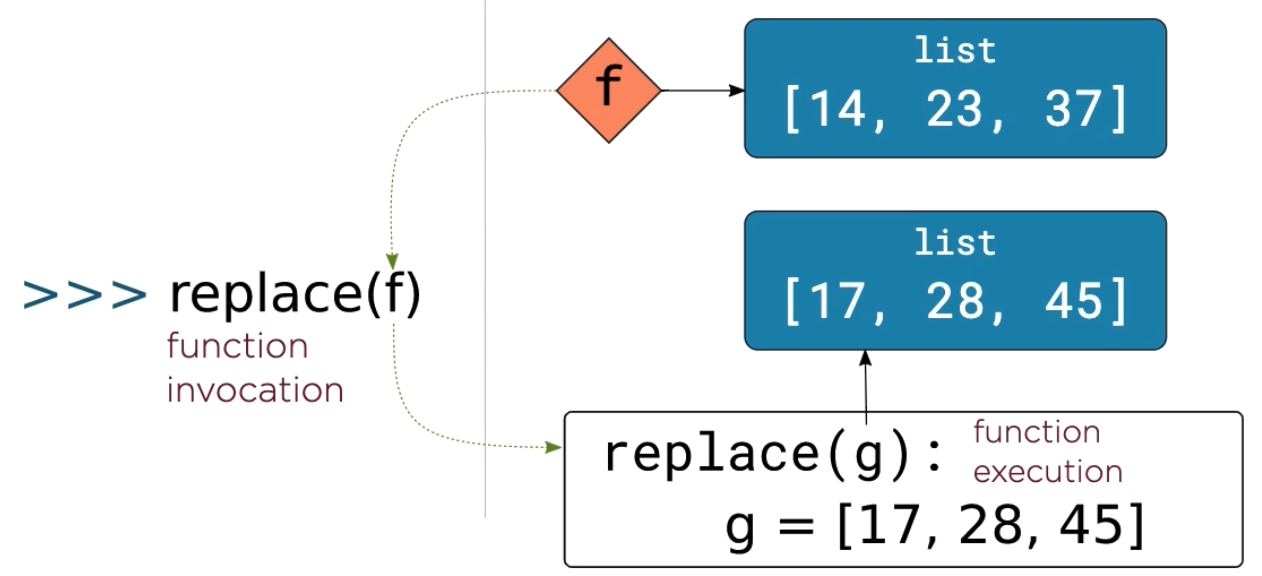

In [77]:
from IPython.core.display import Image, display
display(Image('img/image4.png', width=400, unconfined=True))

In [78]:
f = [14, 23, 37]
def replace(g):
    g = [17, 28, 45]
    print('g = ', g)
replace(f)

g =  [17, 28, 45]


In [79]:
f

[14, 23, 37]

### <font color=lightGreen>Mutable Arguments</font>

In [80]:
def replace_contents(g):
    g[0] = 17
    g[1] = 28
    g[2] = 45
    print('g =', g)

f = [14, 23, 37]
replace_contents(f)

g = [17, 28, 45]


In [81]:
f



[17, 28, 45]

>-   `return` passes back an object reference to the caller
>-   Function arguments are transferred using pass-by-object-reference.
References to objects are copied, not the objects themselves.

### <font color=lightGreen>Return semantics</font>

In [82]:
def f(d):
    return d

c = [6, 10, 16]
e = f(c)
c is e

True

***
## <center><font color=tomato>Function Arguments</font></center>
### <font color=lightGreen>Default Argument Values</font>
Arguments with default values most come after those without default values

In [83]:
def banner(message, border = '-'):
    line = border * len(message)
    print(line)
    print(message)
    print(line)

banner('Norwegian Blue')

--------------
Norwegian Blue
--------------


In [84]:
banner('Sun, Moon and Stars', '*')

*******************
Sun, Moon and Stars
*******************


When assigning a value to a optional argument (with default value),
it has to be called in the call site

In [85]:
banner('Sun, Moon and Stars', border='*')

*******************
Sun, Moon and Stars
*******************


They have to be written in sequence as the function is defined,
in this case the non-optional arguments are called `positional arguments`
and the optionals `keyword arguments`.
However all arguments can be keyword arguments and this way can
be supplied in any order.

Anyway `keyboard arguments` must be specify after `positional arguments`

In [86]:
banner(border='~', message='Hello from Earth')

~~~~~~~~~~~~~~~~
Hello from Earth
~~~~~~~~~~~~~~~~


### <font color=lightGreen>Default value evaluation</font>

In [87]:
import time
time.ctime()

'Mon Jun  8 10:27:04 2020'

In [88]:
def show_default(arg=time.ctime()):
    print(arg)

show_default()

Mon Jun  8 10:27:04 2020


In [89]:
show_default()

Mon Jun  8 10:27:04 2020


- `def` is a statement executed at runtime
- Default arguments evaluated when `def` is executed
- Immutable default values do not cause problems
- Mutable default values cause confusing effects

### <font color=lightGreen>Mutable default Values</font>

In [90]:
def add_spam(menu=[]):
    menu.append('spam')
    return menu

breakfast = ['bacon', 'eggs']
add_spam(menu=breakfast)


['bacon', 'eggs', 'spam']

In [91]:
lunch = ['baked beans']
add_spam(menu=lunch)

['baked beans', 'spam']

In [92]:
add_spam()

['spam']

In [93]:
add_spam()

['spam', 'spam']

In [94]:
add_spam()

['spam', 'spam', 'spam']

In [95]:
add_spam()

['spam', 'spam', 'spam', 'spam']

### <font color=Lime>***Advice***</font>

> -   Always use immutable objects for default values, the following alternative gives a solution for the previous problem
>
> -   Function arguments may have a default value


In [96]:
def add_spam(menu=None):
    if menu is None:
        menu=[]
    menu.append('spam')
    return menu

breakfast = ['bacon', 'eggs']
add_spam(menu=breakfast)


['bacon', 'eggs', 'spam']

In [97]:
lunch = ['baked beans']
add_spam(menu=lunch)

['baked beans', 'spam']

In [98]:
add_spam()

['spam']

In [99]:
add_spam()

['spam']

In [100]:
add_spam()


['spam']

***
## <center><font color=tomato>Python's type system</font></center>

### <font color=lightGreen>Python will not generally perform implicit conversions between types</font>
-   Python uses dynamic typing

In [101]:
def add(a,b):
    return  a + b

add(5,6)

11

In [102]:
add(3.1, 2.4)

5.5

In [103]:
add('news','paper')

'newspaper'

In [104]:
add([1,6], [21, 107])

[1, 6, 21, 107]

In [105]:
try:
    add ('the answer is', 42)
except TypeError as e:
    print(e)

can only concatenate str (not "int") to str


***
## <center><font color=tomato>Scopes in Python</font></center>

- Type declarations are unnecessary in Python
- Names can be rebound as necessary to objects of any type
- Name resolution to objects is managed by scopes and scoping rules
- Scopes in Python do not correspond to source code blocks
- Python names are looked up using the LEGB rule
- Global references can be read from local scopes


### <font color=lightGreen>Scopes</font>

><font color=cadetBlue>Local</font>  Inside the current function
>
><font color=coral>Enclosing</font>  Inside enclosing functions
>
><font color=chartreuse>Global</font>  At the top level of the module
>
><font color=fireBrick>Built-in</font>  In the special builtins module

In the following exercise shows how `count` is only used inside the function
and do not affect the outside `count` variable 

In [106]:
count = 0
def show_count():
    print(count)

def set_count(c):
    count=c

show_count()

0


In [107]:
set_count(5)
show_count()

0


Rebinding global names

In [108]:
count = 0
def show_count():
    print(count)

def set_count(c):
    global count
    count=c

show_count()

0


In [109]:
set_count(5)
show_count()

5


## <center><font color=tomato>Everything is an object in Python</font></center>

In [110]:
import words
type(words)

module

In [111]:
dir(words)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'fetch_words',
 'main',
 'print_items',
 'sys',
 'urlopen']

In [112]:
type(words.fetch_words)

function

In [113]:
dir(words.fetch_words)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [114]:
words.fetch_words.__name__

'fetch_words'

In [115]:
words.fetch_words.__doc__

'Fetch a list of words from a URL\n\n    :param url: The URL of UTF-8 text document.\n    :return: A list of strings containing the words from the document\n    '